 # Árboles de decisiones 
 
 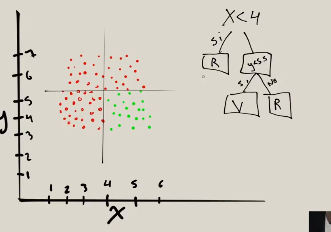
 
 

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer , load_iris 
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib as plt 
import numpy as np


In [2]:
iris = load_iris()

In [3]:
X_train , x_test , Y_train, y_test = train_test_split(iris.data , iris.target)

In [4]:
tree = DecisionTreeClassifier()

In [5]:
tree.fit(X_train , Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
tree.score(x_test , y_test) * 100

89.47368421052632

In [7]:
tree.score(X_train , Y_train) * 100

100.0

In [8]:

export_graphviz(tree , out_file="tree.dot" , class_names=iris.target_names, feature_names=iris.feature_names , impurity=False , filled=True)

## NOTA
En windows en necesario instalar una libreria graphviz  
https://graphviz.gitlab.io/_pages/Download/Download_windows.html7 <br>
    y agregar a la variable de entorno PATH la ruta 
    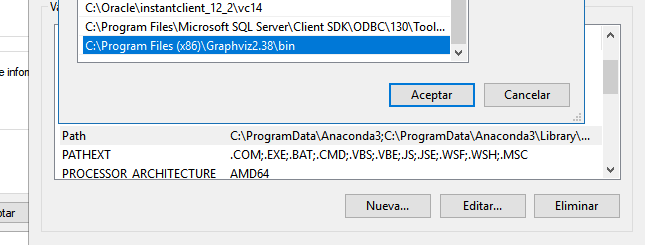

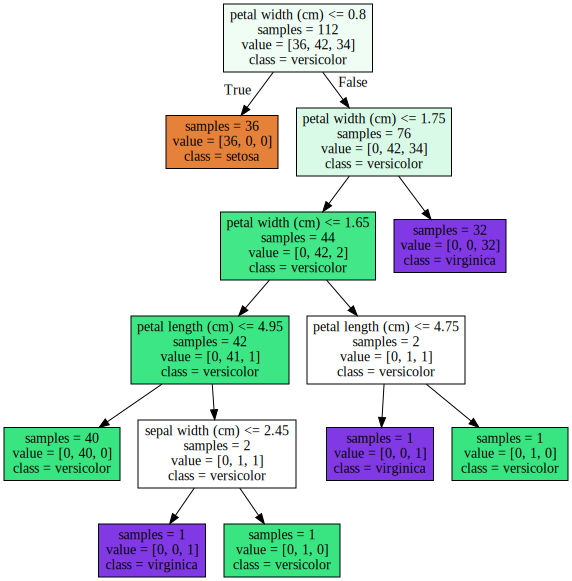

In [22]:
with open("tree.dot") as f :
    dot_graph=f.read()
graphviz.Source(dot_graph)


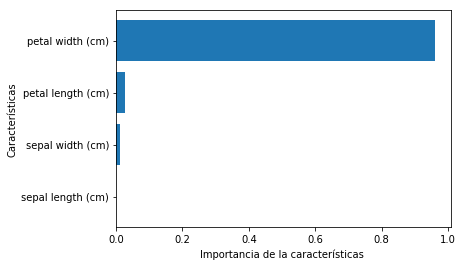

In [18]:
#import matplotlib.pyplot as plt
caract = iris.data.shape[1]
plt.barh( range(caract) , tree.feature_importances_)
plt.yticks(np.arange(caract) , iris.feature_names)
plt.xlabel("Importancia de la características ")
plt.ylabel("Características")
plt.show()

Es evidente que con solo la longitud de los petalos ya es podible tener un alto grado de precisión.

## Representacion de los datos

In [33]:
%matplotlib inline

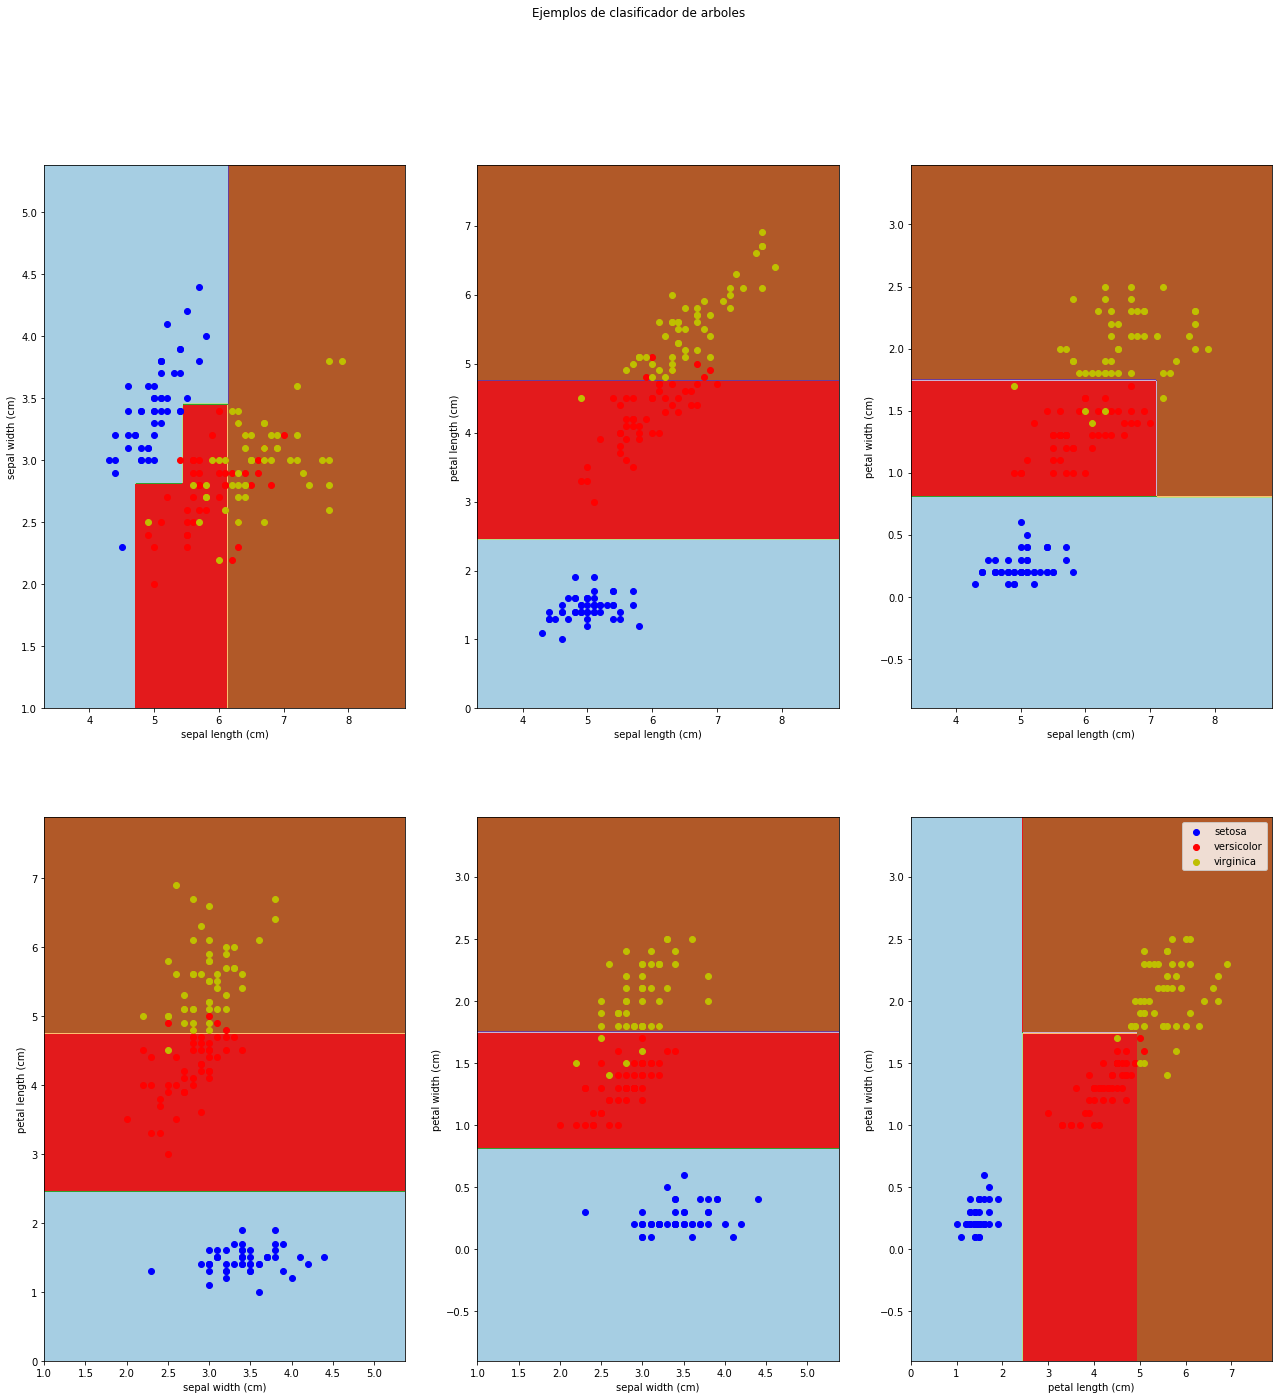

In [36]:
#niveles de desicon del arbol
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train , Y_train)
arbol.score(x_test, y_test) #0.921052
arbol.score(X_train , Y_train) #0732142.9
plt.rcParams['figure.figsize'] = (22,22)
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
 

plt.show()